In [35]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import os 
import cv2

LOAD = True
REBUILD = False
DATADIR = 'datasets/PetImages'
CATEGORIES = ['Dog', 'Cat']

class DogsVSCats():
    IMG_SIZE = 50 
    CATS = f"{DATADIR}/Cat"
    DOGS = f"{DATADIR}/Dog"
    LABELS = {CATS:0, DOGS:1} # one hot vector
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    #self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    self.training_data.append([np.array(img), self.LABELS[label]])
                
                    if label == self.CATS: self.catcount += 1
                    elif label == self.DOGS: self.dogcount += 1
                
                except Exception as e:
                    pass
                
        np.random.shuffle(self.training_data)
        np.save('training_data.npy', self.training_data)
        print('Cats:', self.catcount, '\nDogs:', self.dogcount)
                
if REBUILD:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

if LOAD:
    training_data = np.load('training_data.npy', allow_pickle=True)

In [39]:
from sklearn.model_selection import train_test_split
X = [el[0] for el in training_data]
y = [el[1] for el in training_data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21, stratify=y)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
import pickle

pickle_out = open("pickles/x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("pickles/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open("pickles/x.pickle","rb")
x = pickle.load(pickle_in)

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=X_train.shape[1:]),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
702/702 [==============================] - 67s 95ms/step - loss: 0.6234 - accuracy: 0.6430
Epoch 2/10
702/702 [==============================] - 67s 95ms/step - loss: 0.5161 - accuracy: 0.7447
Epoch 3/10
702/702 [==============================] - 73s 104ms/step - loss: 0.4724 - accuracy: 0.7767
Epoch 4/10
702/702 [==============================] - 69s 99ms/step - loss: 0.4362 - accuracy: 0.7973
Epoch 5/10
702/702 [==============================] - 71s 101ms/step - loss: 0.3994 - accuracy: 0.8176
Epoch 6/10
702/702 [==============================] - 65s 92ms/step - loss: 0.3642 - accuracy: 0.8369
Epoch 7/10
702/702 [==============================] - 65s 92ms/step - loss: 0.3289 - accuracy: 0.8562
Epoch 8/10
702/702 [==============================] - 65s 92ms/step - loss: 0.2871 - accuracy: 0.8775
Epoch 9/10
702/702 [==============================] - 68s 96ms/step - loss: 0.2470 - accuracy: 0.8970
Epoch 10/10
702/702 [==============================] - 68s 97ms/step - loss: 0.2

In [43]:
model.save('cnn_model')
# new_model = load('cnn_model')

INFO:tensorflow:Assets written to: cnn_model/assets


INFO:tensorflow:Assets written to: cnn_model/assets


In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [55]:
model.evaluate(X_test,y_test)
pred = model.predict([X_test])

78/78 [==============================] - 2s 24ms/step


I guess it's a Cat...


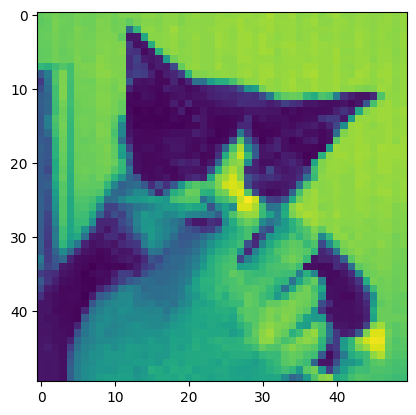

In [69]:
import random

i = random.randint(0,len(pred)-1)
if np.argmax(pred[i]) == 1:
    print("I quess it's a Dog...")
else:
    print("I guess it's a Cat...")
    
plt.imshow(X[i])
plt.show()